In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data preprocessing

In [5]:
df = df.rename(columns={'Genre': 'Gender','Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [7]:
df.drop(['CustomerID'], axis=1, inplace=True)
df

,Gender,Age,Annual_income,Spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### EDA

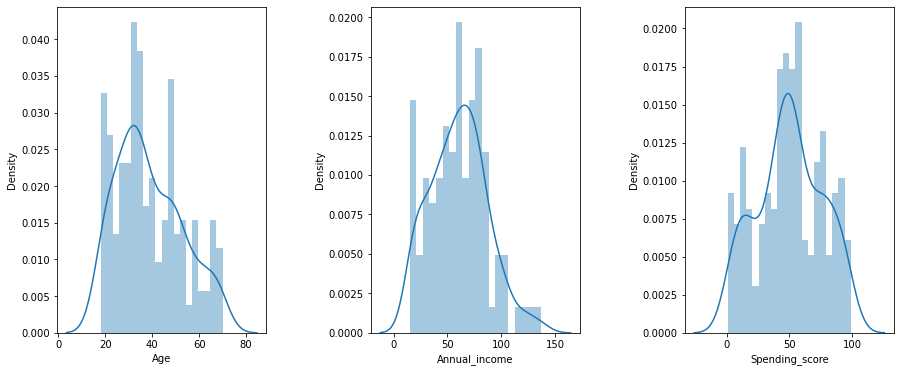

In [19]:
#Density estimations of income, spending and age
plt.figure(1, figsize=(15,6))
feature_list = ['Age','Annual_income','Spending_score']
pos = 1
for feature in feature_list:
    plt.subplot(1,3,pos)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[feature], bins=20,kde=True)
    pos = pos+1
plt.show()

From the above plots it is clear that the distributions resemble a gaussian distribution, which means the majoprity is concentrated at the center and lower number of data points at the extremes.

<AxesSubplot:xlabel='count', ylabel='Gender'>

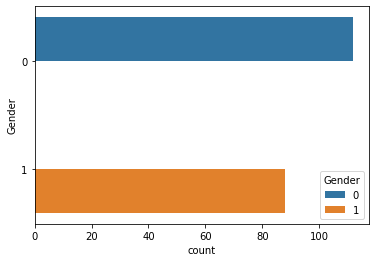

In [9]:
#relations between different variables.
sns.countplot(y='Gender', data=df, hue='Gender')

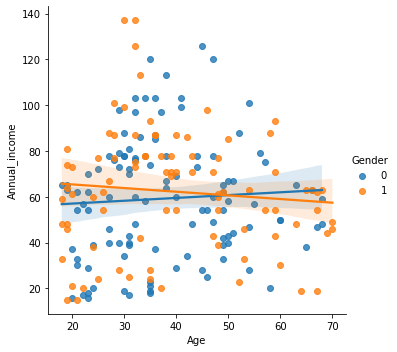

In [10]:
#Age vs income
sns.lmplot(x='Age', y='Annual_income', data=df, hue='Gender')

From the above graphic, we can see that people in their 30s, 40s and 50s tend to earn more than younger or older people.

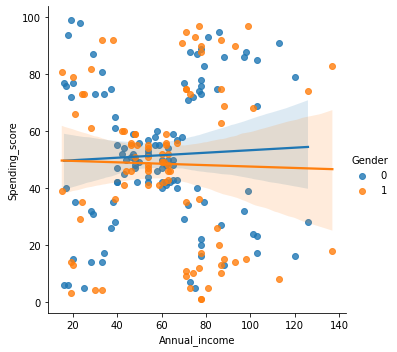

In [11]:
#Spending score vs annual income
sns.lmplot(x='Annual_income', y='Spending_score', data=df, hue='Gender')

The above graphic depicts that the majoriy of people have moderate income and moderate spending score

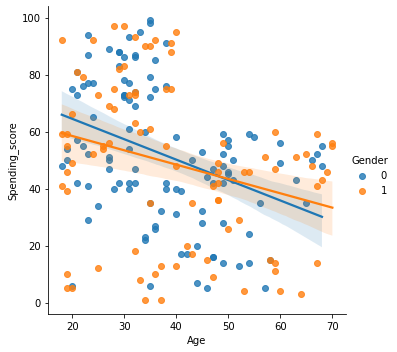

In [12]:
#Age vs Spending_score
sns.lmplot(x='Age', y='Spending_score', data=df, hue='Gender')

The graphic above shows us that young people tend to spend more than older people. Reasons might be because they take more trips or buy more expensive electronics depenging on the trends, etc

### Clustering algorithm

In [17]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [14]:
#pip install --upgrade threadpoolctl

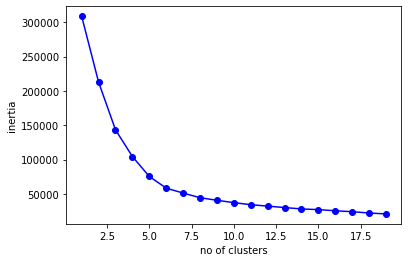

In [18]:
#We will be using elbow method
inertia = []
k = range(1,20)
for i in k:
    model = KMeans(n_clusters=i, init='k-means++',random_state=0)
    model.fit(df[['Age','Annual_income','Spending_score']])
    inertia.append(model.inertia_)
plt.plot(k, inertia, 'bo-')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

From the above elbow method, it is clear that using 5 clusters will give us the best inertia. Which means that splitting on 5 clusters will work better when splitting the datapoints.

In [20]:
model = KMeans(n_clusters = 5, random_state=0)
model.fit(df[['Age','Annual_income','Spending_score']])

KMeans(n_clusters=5, random_state=0)

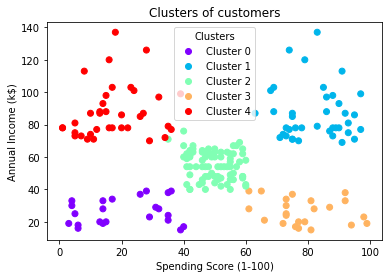

In [28]:
scatter = plt.scatter(df['Spending_score'], df['Annual_income'], c=model.labels_, cmap='rainbow')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(5)], title='Clusters')

We can see from the above graphic that based on annual income and spending we can split the dataset into 5 clusters.This shows which cluster people belong to based on their income and spending.

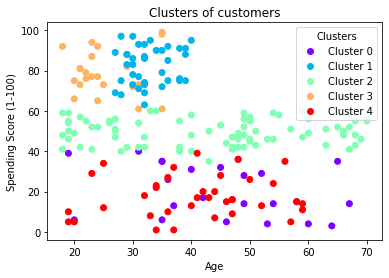

In [29]:
scatter = plt.scatter(df['Age'], df['Spending_score'], c=model.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(5)], title='Clusters')

We can see that 5 clusters are not distinct when taking Spending Score and Age into account.We need to find the optimal number of clusters again for this data.

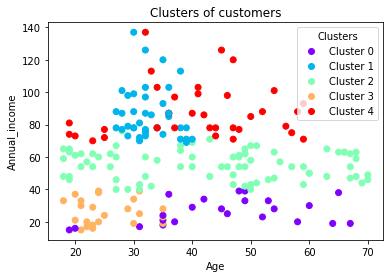

In [30]:
scatter = plt.scatter(df['Age'], df['Annual_income'], c=model.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual_income')
plt.title('Clusters of customers')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(5)], title='Clusters')

As was the case with the previous graphic, we can see that the clusters are not distinct and we have to find optimal clusters for them.

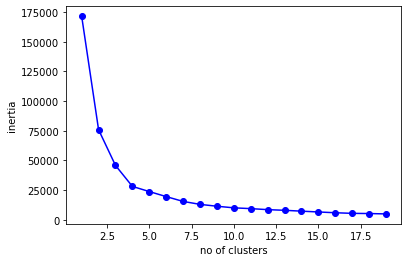

In [31]:
inertia = []
k = range(1,20)
for i in k:
    model = KMeans(n_clusters=i, init='k-means++',random_state=0)
    model.fit(df[['Age','Spending_score']])
    inertia.append(model.inertia_)
plt.plot(k, inertia, 'bo-')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

Looking at the above graph, we will consider 4 as the number of clusters.

In [32]:
model = KMeans(n_clusters = 4, init='k-means++', random_state=0)
model.fit(df[['Age','Spending_score']])

KMeans(n_clusters=4, random_state=0)

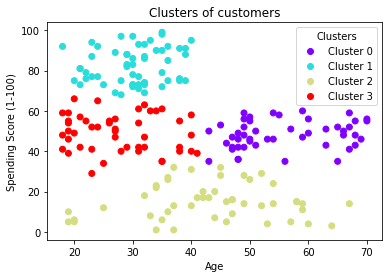

In [33]:
scatter = plt.scatter(df['Age'], df['Spending_score'], c=model.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(4)], title='Clusters')

We can see after changing cluster number, we can see more difference between clusters. 
Similary we will check for Age and annual income.

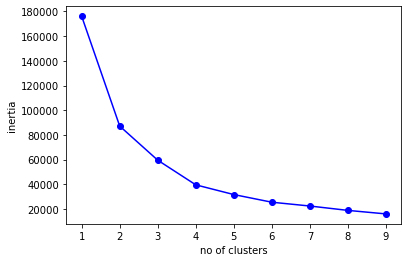

In [34]:
#age vs annual income
X = df[['Age', 'Annual_income']]
inertia = []
k = range(1, 10)
for i in k:
    model = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    model.fit(X)
    inertia.append(model.inertia_)
plt.plot(k, inertia,'bo-')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

We will consider 6 clusters here, because even though the elbow is at 4, we saw that taking into consideration 5 clusters did not work well. Hence we will try with 6 clusters.

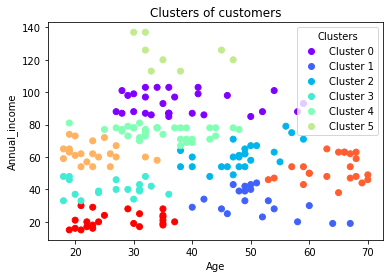

In [37]:
scatter = plt.scatter(df['Age'], df['Annual_income'], c=model.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual_income')
plt.title('Clusters of customers')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(6)], title='Clusters')

### Conclusion

- Spending score is not very different in terms of gender.
- Age and annual income are difficult to predict.
- Age and spending score show us that younger people tend to spend more than older people.